In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import accuracy_score

In [3]:
data = pd.read_csv('heart_cleveland_upload.csv')

In [3]:
def nan_analize(X):
    nan_df = (X.isna().sum() / X.shape[0]).reset_index()
    nan_df.columns=['feature', 'nan_percent']

    plt.figure(figsize=(16,4))
    sns.barplot(nan_df['feature'], nan_df['nan_percent'])
    plt.title('Percent Missing')
    plt.ylabel('Missing', fontsize=12)
    plt.xlabel('Features', fontsize=12)
    plt.xticks(rotation=90)
    plt.show()

In [4]:
data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,condition
0,69,1,0,160,234,1,2,131,0,0.1,1,1,0,0
1,69,0,0,140,239,0,0,151,0,1.8,0,2,0,0
2,66,0,0,150,226,0,0,114,0,2.6,2,0,0,0
3,65,1,0,138,282,1,2,174,0,1.4,1,1,0,1
4,64,1,0,110,211,0,2,144,1,1.8,1,0,0,0


# EDA

In [4]:
from collections import Counter
Counter(data.condition)

Counter({0: 160, 1: 137})

In [6]:
data.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,condition
count,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000
mean,54.542088,0.676768,2.158249,131.693603,247.350168,0.144781,0.996633,149.599327,0.326599,1.055556,0.602694,0.676768,0.835017,0.461279
std,9.049736,0.468500,0.964859,17.762806,51.997583,0.352474,0.994914,22.941562,0.469761,1.166123,0.618187,0.938965,0.956690,0.499340
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,48.000000,0.000000,2.000000,120.000000,211.000000,0.000000,0.000000,133.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,56.000000,1.000000,2.000000,130.000000,243.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,0.000000,0.000000
75%,61.000000,1.000000,3.000000,140.000000,276.000000,0.000000,2.000000,166.000000,1.000000,1.600000,1.000000,1.000000,2.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,3.000000,2.000000,1.000000


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f5b17a4a590>,
      dtype=object)

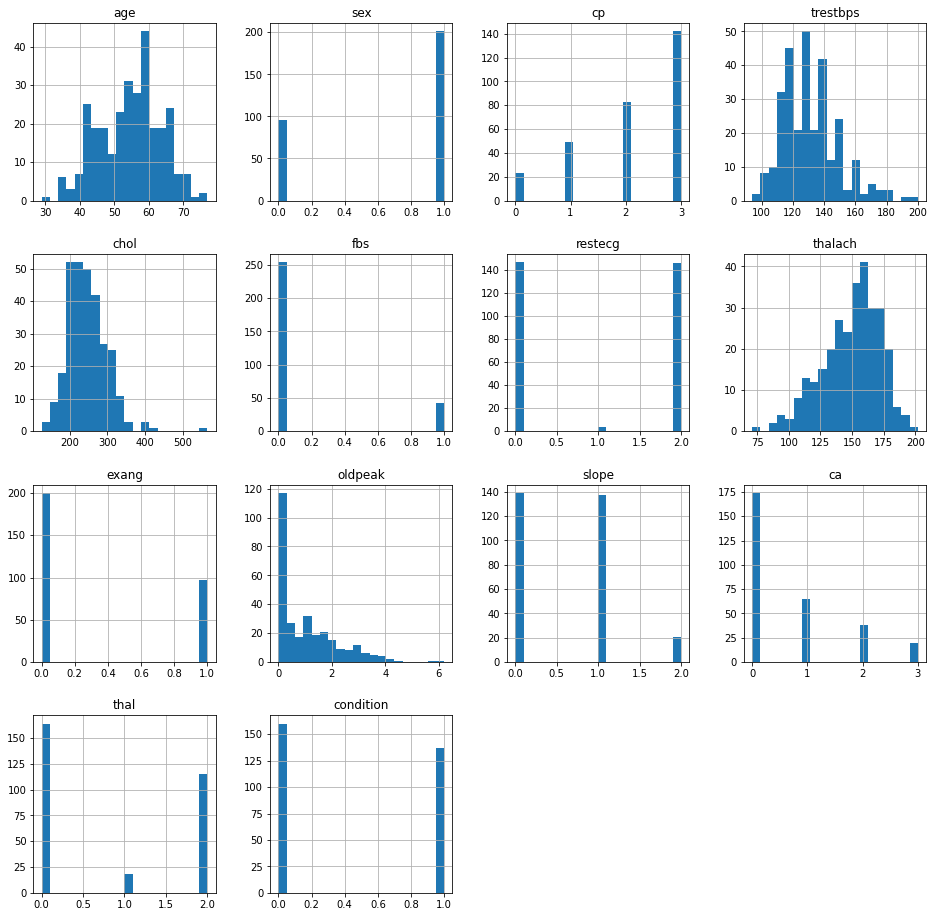

In [7]:
data.hist(figsize=(16, 16), bins=20)

In [8]:
data.columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'condition'],
      dtype='object')

In [9]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


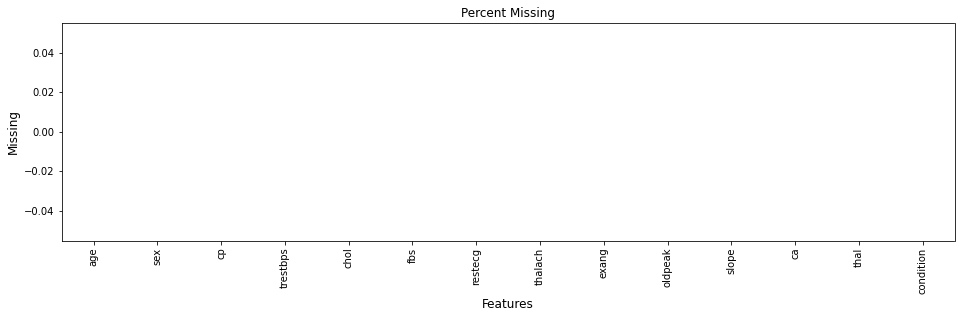

In [10]:
nan_analize(data)

Большое количество бинарных признаков - 'slope', 'ca', 'thal', 'condition'(target), 'fbs', 'restecg', 'sex', 'cp'. 
Объем датасета небольшой, данные чистые без пропусков. Есть дисбаланс классов в пользу 0-го

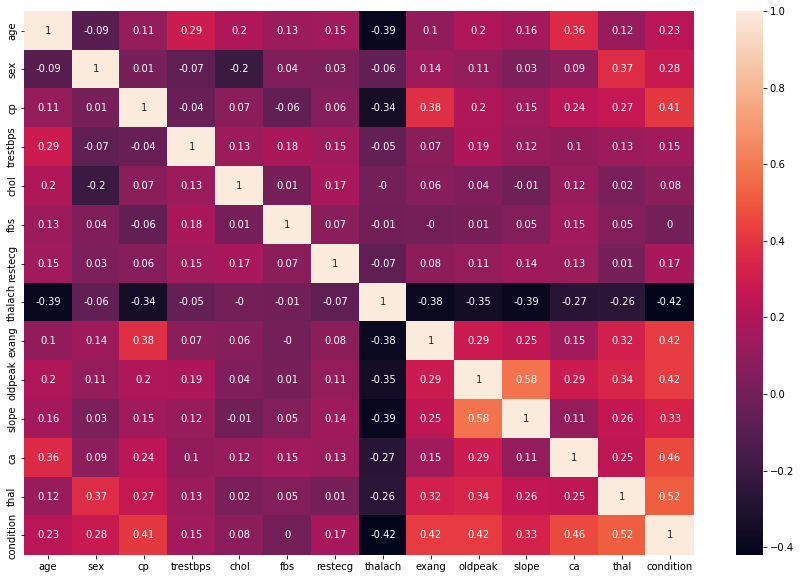

In [11]:
plt.figure(figsize = (15, 10))
cor_matr = np.round(data.corr(), 2)
sns.heatmap(cor_matr, annot=True)
plt.show()

Наблюдаем корреляцию с таргетом (condition) признаков 'cp', 'thalach', 'exang', 'oldpeak', 'ca', 'thal'.

In [5]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
 

In [6]:
X = data.drop(['condition'], axis=1)
y = data.condition

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)

In [15]:
model = LogisticRegression(random_state=42)
model.fit(X_train, y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


LogisticRegression(random_state=42)

In [16]:
y_pred = model.predict(X_test)

In [19]:
accuracy_score(y_test, y_pred)

0.8333333333333334

In [20]:
importance = model.coef_
importance

array([[-0.02849203,  1.05452201,  0.29779659,  0.0202984 ,  0.00388532,
        -0.493734  ,  0.20659051, -0.03689183,  0.73139616,  0.37475382,
         0.23266653,  1.05371643,  0.65283382]])

RandomForest


In [8]:
from sklearn.ensemble import RandomForestRegressor

In [9]:
model1 = RandomForestRegressor(n_estimators=100)
model1.fit(X_train, y_train)

RandomForestRegressor()

In [10]:
model1.predict(X_test)

array([0.8 , 0.72, 0.46, 0.  , 0.57, 0.09, 0.92, 0.72, 0.78, 0.  , 0.15,
       0.75, 0.42, 0.4 , 0.23, 0.3 , 0.93, 0.16, 0.92, 0.07, 0.96, 0.55,
       0.  , 0.14, 0.04, 0.92, 0.83, 0.99, 0.43, 0.61])